In [3]:
from castle.algorithms import PC
from castle.common import GraphDAG
import networkx as nx
import matplotlib.pyplot as plt
from causalbench.data.simulated_feedback.simulated_feedback_loader import load_feedback

2023-03-26 15:05:45,633 - /Users/huigong/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/castle/backend/__init__.py[line:36] - INFO: You can use `os.environ['CASTLE_BACKEND'] = backend` to set the backend(`pytorch` or `mindspore`).
2023-03-26 15:05:45,962 - /Users/huigong/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/castle/algorithms/__init__.py[line:36] - INFO: You are using ``pytorch`` as the backend.


In [4]:
dataset_group_name = 'Network2_amp'

In [5]:
datasets_index = [9,8,14,12,3,17,19,1,18,22,23,32,34,36,42,43,44,48,55,58]
datasets = []
for i in datasets_index:
    data = load_feedback(dataset_group_name, i)
    datasets.append(data)
len(datasets)    

20

In [14]:
dataset_Xs = [dataset['X'] for dataset in datasets]
len(dataset_Xs)

20

In [15]:
def gen_var_name_by_index(index:int):
    return 'X'+str(index+1)

In [16]:
def add_nodes_to_graph(adj_matrix, graph):
    for i in range(len(adj_matrix[0])):
        graph.add_node(gen_var_name_by_index(i))
    return graph    
        
    

In [17]:
def add_edges_to_graph(adj_matrix, graph):
    for i in range(len(adj_matrix[0])):
        for j in range(len(adj_matrix[0])):
            if adj_matrix[i][j] == 1:
                graph.add_edge(gen_var_name_by_index(i), gen_var_name_by_index(j))
    return graph            

In [18]:
def generate_dag_based_on_adj_matrix(adj_matrix):
    g = nx.DiGraph()
    add_nodes_to_graph(adj_matrix, g)
    add_edges_to_graph(adj_matrix, g)
    return g

In [19]:
def show_graph(graph, pos):
    nx.draw_networkx_nodes(graph, pos, node_size = 1000)
    nx.draw_networkx_labels(graph, pos)
    nx.draw_networkx_edges(graph, pos, edge_color='black', arrows = True, arrowsize=30)
    plt.show()

In [20]:
true_causal_matrix = datasets[0]['true_matrix']

In [24]:
def gen_est_matrix_by_pc(dataset):
    pc = PC(variant='stable')
    pc.learn(dataset)
    return pc.causal_matrix

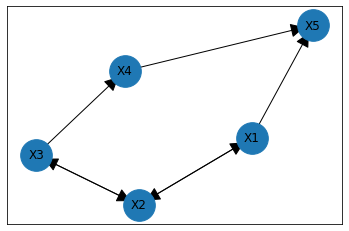

In [25]:
g_true = generate_dag_based_on_adj_matrix(true_causal_matrix)
pos = nx.spring_layout(g_true, scale=5)
show_graph(g_true, pos)

In [27]:
def show_est_graphs(X_list, pos):
    for X in X_list:
        est = gen_est_matrix_by_pc(X)
        graph = generate_dag_based_on_adj_matrix(est)
        show_graph(graph, pos)

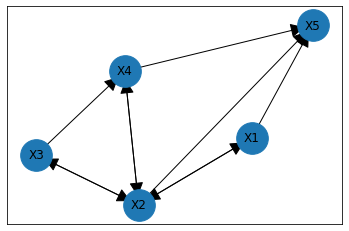

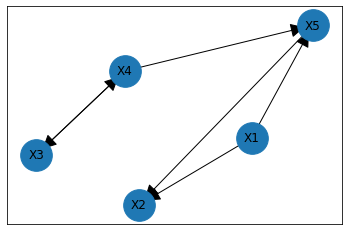

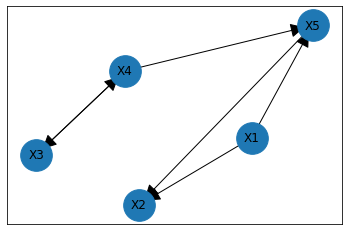

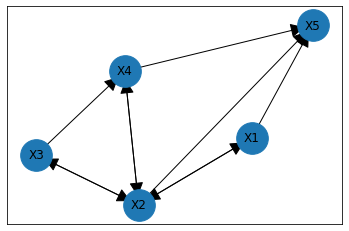

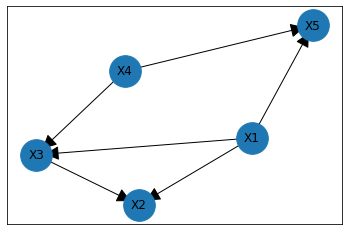

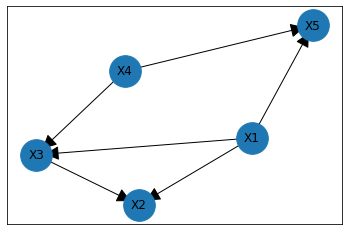

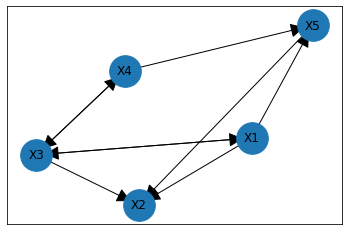

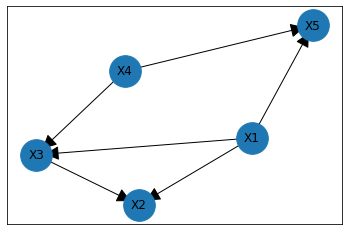

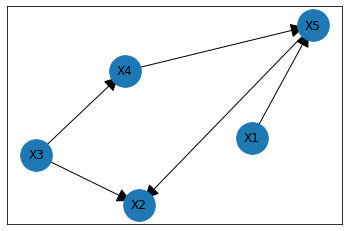

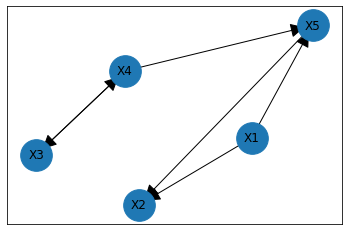

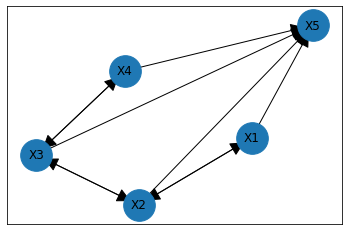

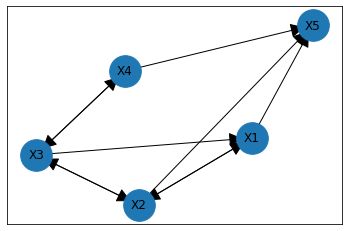

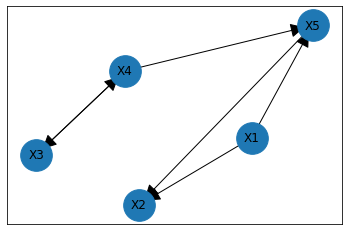

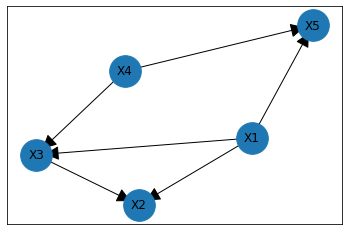

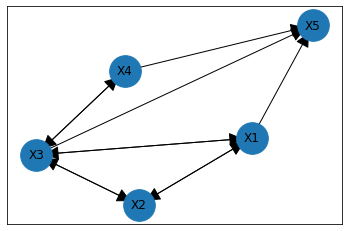

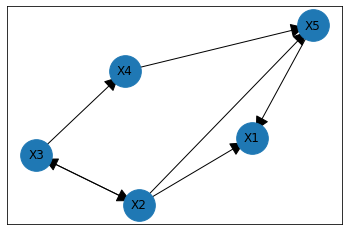

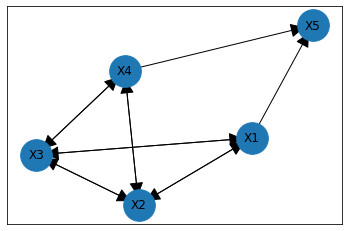

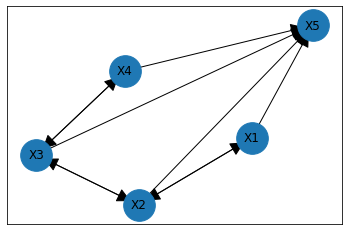

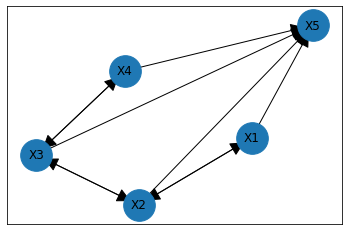

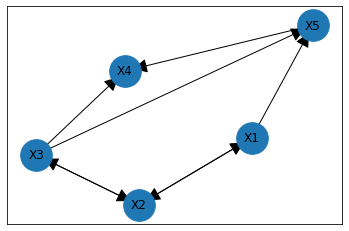

In [28]:
show_est_graphs(dataset_Xs, pos)

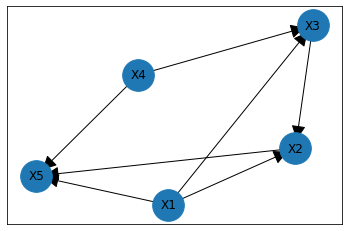

In [334]:
est_1 = gen_est_matrix_by_pc(X_1)
g_1 = generate_dag_based_on_adj_matrix(est_1)
show_graph(g_1, pos)

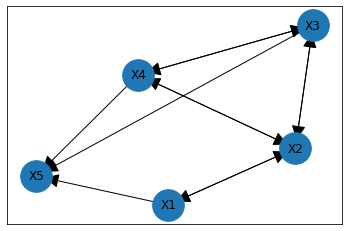

In [335]:
est_2 = gen_est_matrix_by_pc(X_2)
g_2 = generate_dag_based_on_adj_matrix(est_2)
show_graph(g_2, pos)

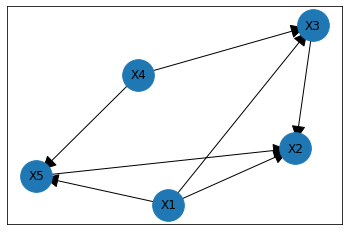

In [336]:
est_3 = gen_est_matrix_by_pc(X_3)
g_3 = generate_dag_based_on_adj_matrix(est_3)
show_graph(g_3, pos)

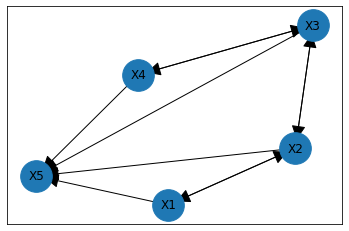

In [337]:
est_4 = gen_est_matrix_by_pc(X_4)
g_4 = generate_dag_based_on_adj_matrix(est_4)
show_graph(g_4, pos)